#### import

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


#### load data

#### corelationmatrix between vader and LIWC

In [2]:
data = pd.read_csv('../data/final_dataset_english_only.csv')


In [3]:
data.head()

,Unnamed: 0,commentId,authorChannelId,authorDisplayName,authorChannelUrl,publishedAt_x,updatedAt,likeCount_x,parentId,textDisplay,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,10,UgxrR4wFxfCwvp2YUwZ4AaABAg,UC5jUy6FXCr82JYzq96-6_Jw,@a.m_0056skycloud-xf5ec,http://www.youtube.com/@a.m_0056skycloud-xf5ec,2025-07-10T11:05:10Z,2025-07-10T11:05:10Z,0,NaN,This is on of her best songs.🌊,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.29
1,14,Ugw-qH8WQZqma_AugoN4AaABAg,UCPj69nCAxIJCqD0gKRjGGhA,@angelinamidbjerlundholm3058,http://www.youtube.com/@angelinamidbjerlundhol...,2021-11-19T21:16:40Z,2021-11-19T21:16:40Z,0,NaN,Right,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,15,UgywUe9rW4J6ynYErt54AaABAg,UCImqCrcNrl7S1NvrmleWDsg,@thesnesgeek,http://www.youtube.com/@thesnesgeek,2021-04-08T06:18:53Z,2021-04-08T06:18:53Z,2,NaN,"This is her best entry. This time, she is a co...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,17,UgzgxTaLTsQN9OPizbR4AaABAg,UC4YwlR3gBH0m8pvcDIOspaA,@fingerstylemelody8139,http://www.youtube.com/@fingerstylemelody8139,2020-11-26T06:59:25Z,2020-11-26T06:59:25Z,0,NaN,Great,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,18,UgxoGDPYm0L0XFpNoUJ4AaABAg,UC4i1M5RayNtzd5f6Wuyr5sQ,@sarariley8696,http://www.youtube.com/@sarariley8696,2020-07-05T13:10:56Z,2020-07-05T13:10:56Z,2,NaN,This song reminds me of a murder case 4 years ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.36


C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_22500\3587284748.py:36: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid[liwc], valid[vader])
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_22500\3587284748.py:36: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid[liwc], valid[vader])
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_22500\3587284748.py:36: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid[liwc], valid[vader])
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_22500\3587284748.py:36: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid[liwc], valid[vader])


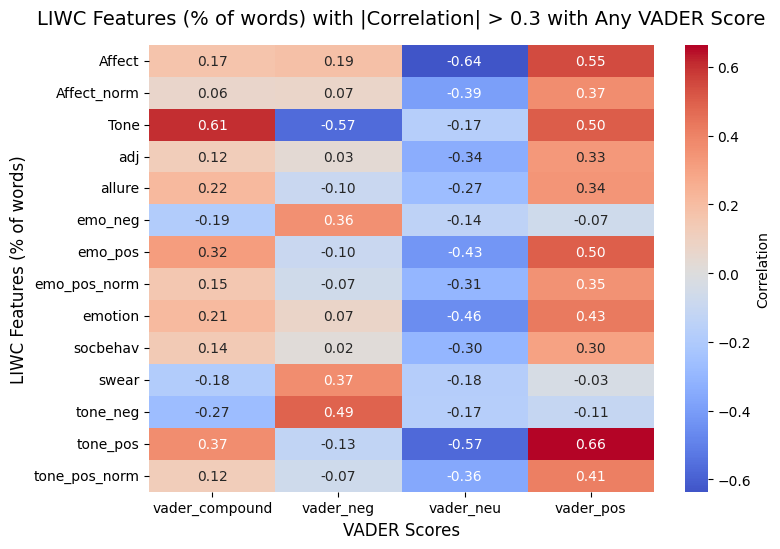

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr
import os

# VADER columns
vader_cols = ["vader_pos", "vader_neg", "vader_neu", "vader_compound"]

# Exclude metadata columns
exclude_cols = vader_cols + [
    "commentId", "videoId", "genre", "lang", 
    "title", "description", "channelId", "channelTitle",
    "publishedAt_x", "publishedAt_y",
    "viewCount", "likeCount_y", "commentCount", "likeCount_x", "Unnamed: 0",
    "parentId", "favoriteCount", "madeForKids", "selfDeclaredMadeForKids",
    "Segment", "Comma"
]

# Select LIWC percentage features
liwc_cols = [c for c in data.columns if c not in exclude_cols]

# Ensure numeric
for col in liwc_cols + vader_cols:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# --- Compute Pearson correlations with p-values ---
results = []
MIN_VALID = 500  # require at least 500 valid rows to include

for liwc in liwc_cols:
    for vader in vader_cols:
        valid = data[[liwc, vader]].dropna()
        if len(valid) < 2 or len(valid) < MIN_VALID:
            continue
        corr, pval = pearsonr(valid[liwc], valid[vader])
        results.append((liwc, vader, corr, pval, len(valid)))

results_df = pd.DataFrame(results, columns=["LIWC", "VADER", "corr", "pval", "n"])

# Pivot into a correlation matrix for heatmap
corr_matrix = results_df.pivot(index="LIWC", columns="VADER", values="corr")

# Filter: keep only LIWC features with at least one |corr| > 0.3
mask = (corr_matrix.abs() > 0.3).any(axis=1)
filtered_corr = corr_matrix.loc[mask]

# --- Plot ---
plt.figure(figsize=(8, len(filtered_corr) * 0.4))
sns.heatmap(
    filtered_corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Correlation"}
)

plt.title("LIWC Features (% of words) with |Correlation| > 0.3 with Any VADER Score",
          fontsize=14, pad=15)
plt.xlabel("VADER Scores", fontsize=12)
plt.ylabel("LIWC Features (% of words)", fontsize=12)
plt.tight_layout()

# Ensure output dir
os.makedirs("plots/liwc", exist_ok=True)
plt.savefig("plots/liwc/liwc_vader_correlation_percent_filtered.png", dpi=300)
plt.show()

# --- Save detailed results with p-values ---
results_df.to_csv("plots/liwc/liwc_vader_correlations_with_pvals.csv", index=False)


C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_22500\3587284748.py:36: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid[liwc], valid[vader])
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_22500\3587284748.py:36: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid[liwc], valid[vader])
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_22500\3587284748.py:36: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid[liwc], valid[vader])
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_22500\3587284748.py:36: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid[liwc], valid[vader])


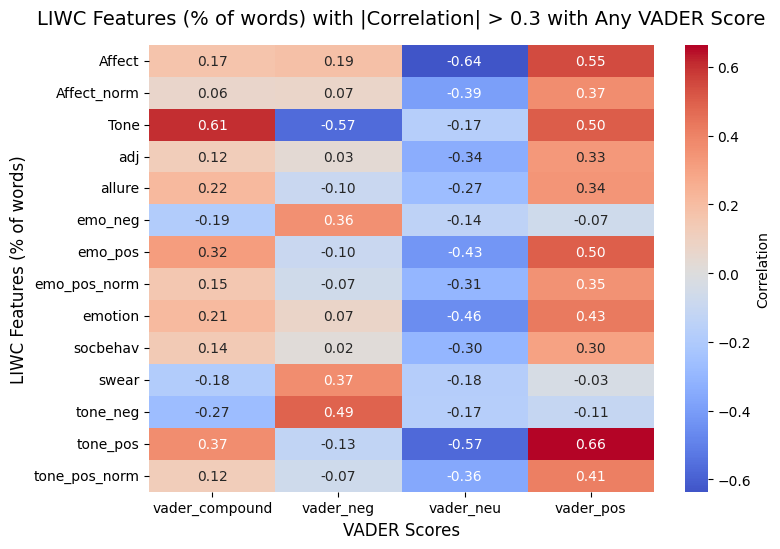

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr
import os

# VADER columns
vader_cols = ["vader_pos", "vader_neg", "vader_neu", "vader_compound"]

# Exclude metadata columns
exclude_cols = vader_cols + [
    "commentId", "videoId", "genre", "lang", 
    "title", "description", "channelId", "channelTitle",
    "publishedAt_x", "publishedAt_y",
    "viewCount", "likeCount_y", "commentCount", "likeCount_x", "Unnamed: 0",
    "parentId", "favoriteCount", "madeForKids", "selfDeclaredMadeForKids",
    "Segment", "Comma"
]

# Select LIWC percentage features
liwc_cols = [c for c in data.columns if c not in exclude_cols]

# Ensure numeric
for col in liwc_cols + vader_cols:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# --- Compute Pearson correlations with p-values ---
results = []
MIN_VALID = 500  # require at least 500 valid rows to include

for liwc in liwc_cols:
    for vader in vader_cols:
        valid = data[[liwc, vader]].dropna()
        if len(valid) < 2 or len(valid) < MIN_VALID:
            continue
        corr, pval = pearsonr(valid[liwc], valid[vader])
        results.append((liwc, vader, corr, pval, len(valid)))

results_df = pd.DataFrame(results, columns=["LIWC", "VADER", "corr", "pval", "n"])

# Pivot into a correlation matrix for heatmap
corr_matrix = results_df.pivot(index="LIWC", columns="VADER", values="corr")

# Filter: keep only LIWC features with at least one |corr| > 0.3
mask = (corr_matrix.abs() > 0.3).any(axis=1)
filtered_corr = corr_matrix.loc[mask]

# --- Plot ---
plt.figure(figsize=(8, len(filtered_corr) * 0.4))
sns.heatmap(
    filtered_corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Correlation"}
)

plt.title("LIWC Features (% of words) with |Correlation| > 0.3 with Any VADER Score",
          fontsize=14, pad=15)
plt.xlabel("VADER Scores", fontsize=12)
plt.ylabel("LIWC Features (% of words)", fontsize=12)
plt.tight_layout()

# Ensure output dir
os.makedirs("plots/liwc", exist_ok=True)
plt.savefig("plots/liwc/liwc_vader_correlation_percent_filtered.png", dpi=300)
plt.show()

# --- Save detailed results with p-values ---
results_df.to_csv("plots/liwc/liwc_vader_correlations_with_pvals.csv", index=False)


C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_22500\3587284748.py:36: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid[liwc], valid[vader])
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_22500\3587284748.py:36: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid[liwc], valid[vader])
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_22500\3587284748.py:36: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid[liwc], valid[vader])
C:\Users\Tobias Wollendorfer\AppData\Local\Temp\ipykernel_22500\3587284748.py:36: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, pval = pearsonr(valid[liwc], valid[vader])


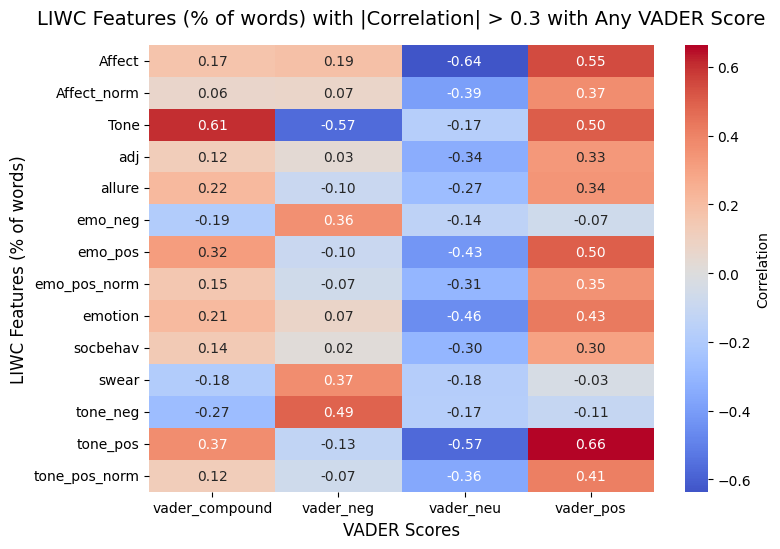

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr
import os

# VADER columns
vader_cols = ["vader_pos", "vader_neg", "vader_neu", "vader_compound"]

# Exclude metadata columns
exclude_cols = vader_cols + [
    "commentId", "videoId", "genre", "lang", 
    "title", "description", "channelId", "channelTitle",
    "publishedAt_x", "publishedAt_y",
    "viewCount", "likeCount_y", "commentCount", "likeCount_x", "Unnamed: 0",
    "parentId", "favoriteCount", "madeForKids", "selfDeclaredMadeForKids",
    "Segment", "Comma"
]

# Select LIWC percentage features
liwc_cols = [c for c in data.columns if c not in exclude_cols]

# Ensure numeric
for col in liwc_cols + vader_cols:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# --- Compute Pearson correlations with p-values ---
results = []
MIN_VALID = 500  # require at least 500 valid rows to include

for liwc in liwc_cols:
    for vader in vader_cols:
        valid = data[[liwc, vader]].dropna()
        if len(valid) < 2 or len(valid) < MIN_VALID:
            continue
        corr, pval = pearsonr(valid[liwc], valid[vader])
        results.append((liwc, vader, corr, pval, len(valid)))

results_df = pd.DataFrame(results, columns=["LIWC", "VADER", "corr", "pval", "n"])

# Pivot into a correlation matrix for heatmap
corr_matrix = results_df.pivot(index="LIWC", columns="VADER", values="corr")

# Filter: keep only LIWC features with at least one |corr| > 0.3
mask = (corr_matrix.abs() > 0.3).any(axis=1)
filtered_corr = corr_matrix.loc[mask]

# --- Plot ---
plt.figure(figsize=(8, len(filtered_corr) * 0.4))
sns.heatmap(
    filtered_corr,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Correlation"}
)

plt.title("LIWC Features (% of words) with |Correlation| > 0.3 with Any VADER Score",
          fontsize=14, pad=15)
plt.xlabel("VADER Scores", fontsize=12)
plt.ylabel("LIWC Features (% of words)", fontsize=12)
plt.tight_layout()

# Ensure output dir
os.makedirs("plots/liwc", exist_ok=True)
plt.savefig("plots/liwc/liwc_vader_correlation_percent_filtered.png", dpi=300)
plt.show()

# --- Save detailed results with p-values ---
results_df.to_csv("plots/liwc/liwc_vader_correlations_with_pvals.csv", index=False)
